# Bike Share Analytics and Recommendations for Offers
### by Chelsea Shu

The Ford Bikes are used quite frequently by both commuters and non-commuters. In this project, I define "commuter trip" and find the five most popular commuter trips. Then I analyze the usage of bikes by location, day, and time of day to best recommend offers to incentivize people to ride Ford bikes more often and to keep customer retention high. 

In order to find out the five most popular commuter trips, I first defined commuter trips as trips that take place Monday through Friday, begin and end at different stations, and are less than 1.5 hours long. Furthermore, the trip must take place from 7-9:59am and 4-6:59pm. Because these are typical commute hours, I made the assumption that the bikes are used for commuting between these hours, but to confirm, I made a histogram to demonstrate the most frequent hours that people use the bikes. 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Waiting on bqjob_r6a4661b8ce4b7af1_0000016d709ba1c9_1 ... (0s) Current status: DONE   

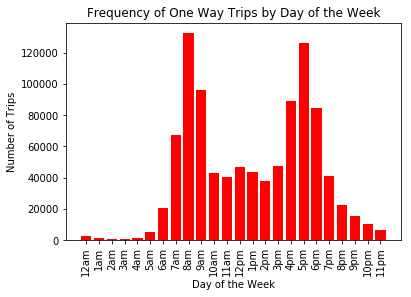

In [55]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT * FROM `tidy-crane-251323.bike_trip_data.pop_hours`' > pop_hours.csv
pop_hours = pd.read_csv("pop_hours.csv")


width = 0.05 # the width of the bars
hours = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am','8am','9am','10am','11am','12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm','8pm','9pm','10pm','11pm']
hour = pop_hours.start_hour
plt.bar(hour, pop_hours.count_hour, color = 'r')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Frequency of One Way Trips by Day of the Week')
plt.xticks(np.arange(0, 24), hours, rotation = 'vertical')
plt.show()

As we can see from the the histogram above, the most popular hours that people use the bikes are the hours 7am, 8am, and 9am as well as 4pm, 5pm, and 6pm. I have highlighted those bins in green for clarity.

## The Five Most Popular Commuter Trips

After selecting for the criteria of commuters, I counted the the number of each trip path (from start station to end station) that people take and sorted the trips from greatest amount to least amount. I have shown the five most popular trips in the table below.

In [58]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.trips_pop` order by num_trips DESC LIMIT 5' > trips_pop.csv
trips_pop_5 = pd.read_csv("trips_pop.csv")
trips_pop_5

Waiting on bqjob_r7a9d4853792c8461_0000016d70a978be_1 ... (1s) Current status: DONE   

,start_station_name,end_station_name,num_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5164
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5121
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5033
3,Embarcadero at Sansome,Steuart at Market,4896
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4752


## Recommendations


### Bike Usage Based on Location

In order to locate where the bikes could get more usage, the average percent of bikes used at each bike station was calculated. There were some data that had the total number of bikes at a station to be zero, but this data reflected moments before the installation of the station was complete, so those data were dropped.  The number of docks available represents the number of bikes used so the percentage of bikes used was calculated by dividing the number of docks available by the total number of bikes. The average of this data was then taken for each bike station, resulting in the table below, which has the ten bike stations with the least bike usage. 

In [18]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.percent_bikes_used_with_name` order by avg_percent_bikes_used ASC LIMIT 10' > least_used_stations.csv
least_used_stations = pd.read_csv("least_used_stations.csv")
least_used_stations

Waiting on bqjob_r69c203d722882a45_0000016d7070dde8_1 ... (0s) Current status: DONE   

,avg_percent_bikes_used,station_id,name
0,0.417955,50,Harry Bridges Plaza (Ferry Building)
1,0.419324,70,San Francisco Caltrain (Townsend at 4th)
2,0.432527,36,California Ave Caltrain Station
3,0.443291,54,Embarcadero at Bryant
4,0.452321,3,San Jose Civic Center
5,0.453613,69,San Francisco Caltrain 2 (330 Townsend)
6,0.455564,35,University and Emerson
7,0.457443,74,Steuart at Market
8,0.457672,7,Paseo de San Antonio
9,0.462784,90,5th St at Folsom St


This table shows the ten stations with the least bike usage. Most of these stations have below 50% bike usage.  In order to promote higher bike usage, I recommend a deal that offers lowered prices if the trip starts from one of these ten stations. 

### Bike Usage Based on the Day of the Week

To explore the main reasons why people use the bikes, I decided to look at the data based on the day of the week. Note: the days of the week in the table below are numbered 1-7. The number 1 corresponds to Sunday, the number 2 corresponds to Monday, and so forth. The number 7 corresponds to Saturday. 

Waiting on bqjob_r654d140e41a7f969_0000016d7093f291_1 ... (0s) Current status: DONE   

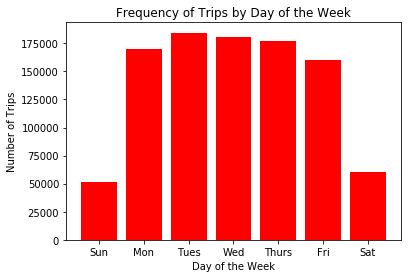

In [44]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.weekends_vs_weekdays_edited`' > weekends_vs_weekdays.csv
weekends_vs_weekdays_trips = pd.read_csv("weekends_vs_weekdays.csv")
weekends_vs_weekdays_trips


width = 0.2 # the width of the bars
days = 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'
num_trip = weekends_vs_weekdays_trips.num_trips
plt.bar(weekends_vs_weekdays_trips.day, num_trip, color = 'r')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Frequency of Trips by Day of the Week')
plt.xticks(np.arange(1,8), days)
plt.show()

From this bar graph, we can see that on the days 1 and 7 (Sunday and Saturday), there are less trips than during the other days of the week. This makes me speculate that perhaps the bikes are mostly used for commuting on the weekdays. To explore this more, I look at one way and round trip data.

#### One Way Trips

Waiting on bqjob_r372bdd4b0c9a808e_0000016d704f5de3_1 ... (0s) Current status: DONE   

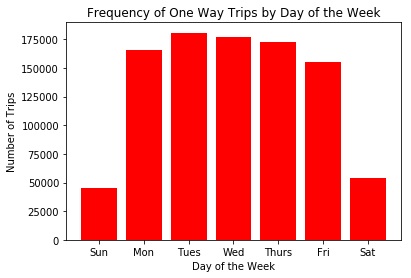

In [11]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.oneway`' > one_way.csv
one_way = pd.read_csv("one_way.csv")
one_way


width = 0.2 # the width of the bars
days = 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'
one_way_trips = one_way.num_oneway
plt.bar(one_way.day, one_way_trips, color = 'r')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Frequency of One Way Trips by Day of the Week')
plt.xticks(np.arange(1,8), days)
plt.show()

As we can see from the bar graph, there are signifcantly more one way trips on the weekdays than on the weekends.

#### Round Trip Frequency


Waiting on bqjob_r7ffda307b75ee3a4_0000016d70ac65d1_1 ... (0s) Current status: DONE   

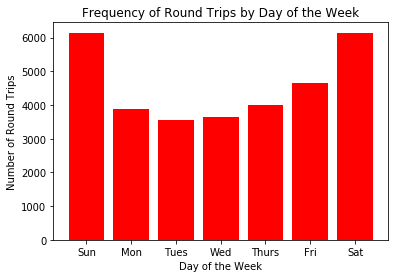

In [59]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.round_trip`' > round_trip.csv

round_trip = pd.read_csv("round_trip.csv")
round_trip
    
width = 0.2 # the width of the bars
days = 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'
round_trip_trips = round_trip.num_round_trip
plt.bar(round_trip.day, round_trip_trips, color = 'r')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Round Trips')
plt.title('Frequency of Round Trips by Day of the Week')
plt.xticks(np.arange(1,8), days)
plt.show()

As we can see from the bar chart above, there are more round trip trips on the weekends than the weekdays.  To explore why this difference exists, I analyze the average length of trips taken by each day of the week below. 

#### Average Trip Length by Day

Waiting on bqjob_r19198632d24b1081_0000016d70507124_1 ... (0s) Current status: DONE   

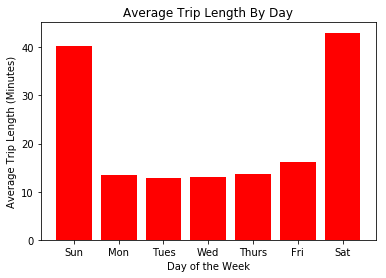

In [15]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.avg_trip_time` order by avg_trip_time desc' > avg_trip_time_per_day.csv

avg_trip_time_by_day = pd.read_csv("avg_trip_time_per_day.csv")



width = 0.2 # the width of the bars
days = 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'
avg_trip = avg_trip_time_by_day.avg_trip_time
plt.bar(avg_trip_time_by_day.day, avg_trip, color = 'r')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Length (Minutes)')
plt.title('Average Trip Length By Day')
plt.xticks(np.arange(1,8), days)

plt.show()

As we can see from the bar plot above, the average trip length is higher on the weekends than the weekdays. On the weekends, the average trip length is approximately 40 minutes whereas the average trip length is approximately 16 minutes on the weekdays. 


Combining our results about one way trips, round trips, and average trip length, I come to the conclusion that there are more one way trips on the weekdays than the weekends because people are using the bikes for commuting.  There are less trips overall on the weekends than the weekdays; however, there are more round trip trips and longer trips on the weekends than the weekdays. Longer trips and round trip trips imply that the bikes are not being used as a means of transportation, but rather for recreation.  

From my findings here, I recommend an offer that would offer a flat (discounted) rate for four hours on the weekends only. If the normal rate for bikes is two dollars per half hour, then I would make the four hour rate on the weekend to be thirteen dollars rather than the sixteen dollars it would cost if there was no deal. It is important that this new discounted deal is cheaper than the day pass by a little; otherwise, people would not think that this is a deal. The goal of this offer is to incentivize people to use the bikes on the weekends, which is when there is the least usage. Additionally, it seems that the people who do use the bikes on the weekend use them for leisure, so we want to target and promote usage of bikes in that way by offering the four hour deal. 

### Bike Usage Based on Time of Day

In [37]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `tidy-crane-251323.bike_trip_data.amount_trips_by_hour`' > trips_by_hour.csv

trips_by_hour = pd.read_csv("trips_by_hour.csv")
trips_by_hour


Waiting on bqjob_r6acca13724cfc04f_0000016d7089acca_1 ... (0s) Current status: DONE   

,hour,count
0,23,6195
1,22,10270
2,21,15258
3,6,20519
4,20,22747
5,14,37852
6,11,40407
7,19,41071
8,10,42782
9,13,43714


As we can see from the table above, the hours with the least bike usage are the hours 23, 22, and 21, which are 11pm, 10pm, and 9pm.  From this data, I recommend offering a deal that allows usage of the bikes for a fraction of the price from 9pm to 12am. Not many people use bikes when it is late at night, so offering a deal for a low price will incentivize riders to use the bikes at night. Additionally, it could be promoted and advertised that the bikes could be used for safety purposes, as they could help people get home safer, rather than walking in the dark late at night. 

## Conclusion

In conclusion, the five most popular "commuter trips" are the trips from:
    1. 2nd at Townsend to Harry Bridges Plaza (Ferry Building)
    2. Harry Bridges Plaza (Ferry Building) to 2nd at Townsend 
    3. San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th	
    4. Embarcadero at Sansome to Steuart at Market
    5. Embarcadero at Folsom to San Francisco Caltrain (Townsend at 4th)
    
 
Based on my findings, I recommend that we offer three additional deals:
    1. Offer lowered rates if the bike trip starts from the ten stations that have the least bike usage
    2. Offer a flat discounted rate for four hours on the weekends only
    3. Offer a very discounted rate for the usage of bikes from 9pm to midnight

I recognize that commuter trips were the focus; however, commuter trips are the main usage of bikes, so I think it would be beneficial to offer some deals that could be geared towards non-commuters because that is where bike usage is lacking. With the right advertising and the right deals, bike ridership can be increased. 